## Stern - Gerlach Experiment

The Stern - Gerlach experiment demonstrated that the "spin" is quantized - it exists only in discrete values. This was the observation that proved foundational to the field of quantum mechanics.

### The Experiment:
####  The Apparatus:
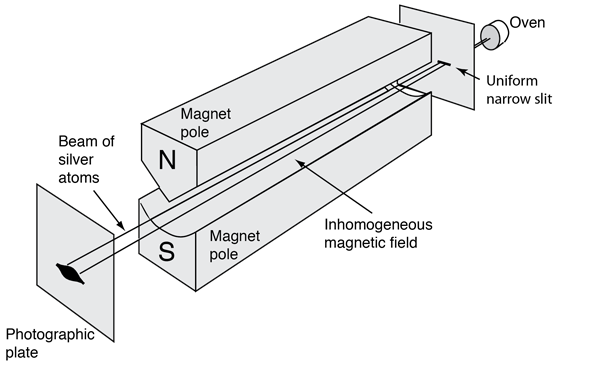

Credits for the drawing: http://hyperphysics.phy-astr.gsu.edu/hbase/spin.html 

### Explanation:
#### What’s “Spin”?
Think of spin as a property of tiny particles (like electrons or atoms), similar to how we describe the Earth spinning on its axis. But unlike the Earth, these particles don’t spin in the usual sense—it’s a special kind of quantum mechanical property that is important in how particles behave.

#### What Did Stern and Gerlach Do?
They wanted to test whether this "spin" property behaves in a strange quantum way. Here’s what they did:

- Silver Atoms: They used silver atoms, which have a spin that they wanted to measure.

- Magnetic Field: They shot the silver atoms through a magnetic field. Normally, you might expect these atoms to spread out randomly, forming a broad line on a screen (detector) behind the magnetic field.

- The Key Prediction: Quantum theory predicted that if "spin" was real and quantized (existing in only specific values), the silver atoms wouldn’t spread out randomly. Instead, they would split into two distinct lines on the detector.

#### The Results:
That’s exactly what happened! Instead of one broad line, the atoms split into two paths. This meant that the spin of the atoms could only be in two possible states, which we now call “up” and “down”.

#### What Did This Prove?
This experiment showed that spin is quantized, meaning particles don’t have just any possible spin value—they can only have certain specific values (like "up" or "down"). This was a huge confirmation of quantum mechanics, which says that many properties of particles are not continuous but come in discrete amounts.

In [2]:
%matplotlib inline

from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Qobj, Bloch, basis, ket, tensor

In [20]:
Direction = namedtuple("Direction", ["theta", "phi"]) # theta is the polar angle and phi is the azimuthal angle

# Let us generate random directions

def random_direction():
    r = 0
    while r == 0:
        x,y,z = np.random.normal(0,1,3) # normal distribution is used to generate three components for the particle's magnetic moment vector.

        r = np.sqrt(x**2 + y**2 + z**2) # we normalized the vector to ensure that it is unit vector, since we only care about the direction not the magnitude.

    # These are cartesian coordinates, so we need to convert them to spherical corrdinates

    phi = np.arctan2(y,x)
    theta = np.arccos(z/r)

    return Direction(theta=theta, phi=phi)

In [21]:
# we convert the sphericalcoordinates to cartesian
def classical_state(d):
    """ Prepare a spin state given a direction. """
    x = np.sin(d.theta) * np.cos(d.phi) 
    y = np.sin(d.theta) * np.sin(d.phi)
    z = np.cos(d.theta)
    return np.array([x, y, z])

In [22]:
classical_up = np.array([0,0,1]) # This vector indicates a direction along the z axis. And in context of spin this is the up state.

def classical_spin(c):
    return classical_up.dot(c) # this function computes how much our vector c aligns with the z direction

In [23]:
# now let us simulate the experiment
def classical_stern_gerlach(n):
    # here n represents the number of atoms or particles to simulate

    directions = [random_direction() for _ in range(n)]
    atoms = [classical_state(d) for d in directions]
    spins = [classical_spin(c) for c in atoms]

    return atoms, spins

# here we generated random directions for a number of atoms, and converted that to cartesian and measures the z component of the spin for each atom

In [39]:
def plot_classical_results(atoms, spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Classical Outcome", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax2 = plt.subplot(1, 2, 2)

    b = qutip.Bloch(fig=fig, axes=ax1)
    b.vector_width = 1
    b.vector_color = ["#ff{:x}0ff".format(i, i) for i in range(10)]
    b.zlabel = ["$z$", ""]
    b.add_vectors(atoms)
    b.make_sphere()

    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")

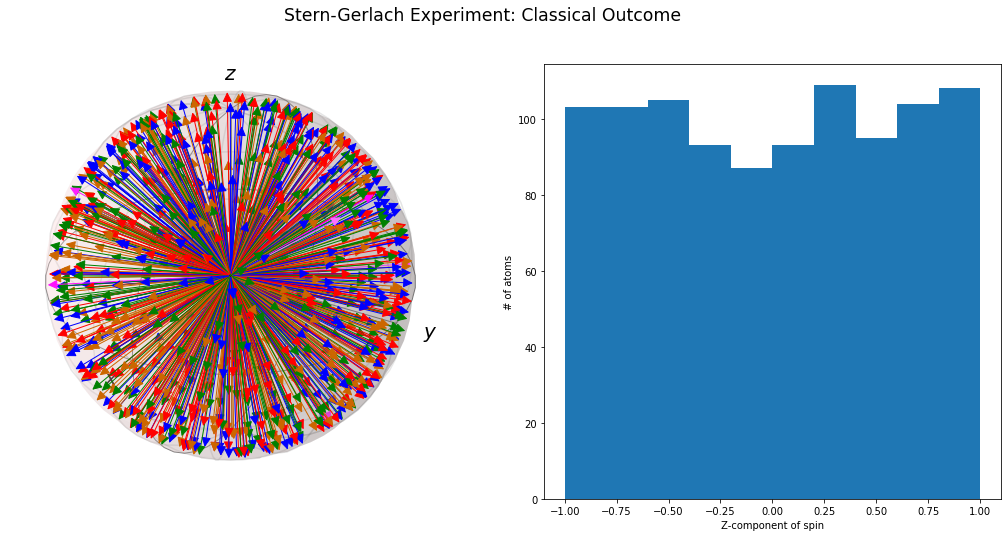

In [40]:
atoms, spins = classical_stern_gerlach(1000)
plot_classical_results(atoms, spins)

We expected a similar uniform distribution right? But instead we got this:

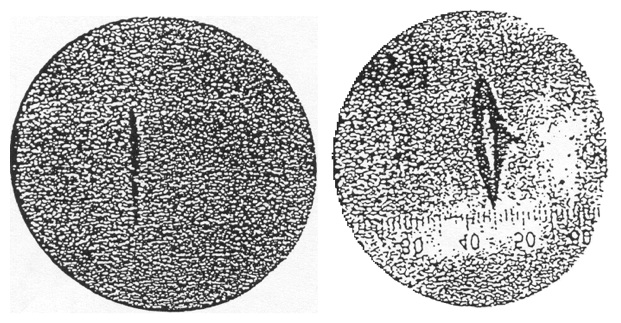

In [41]:

def plot_real_vs_actual(spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Real vs Actual", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    ax1.hist([np.random.choice([1, -1]) for _ in spins])
    ax1.set_xlabel("Z-component of spin")
    ax1.set_ylabel("# of atoms")
    
    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")

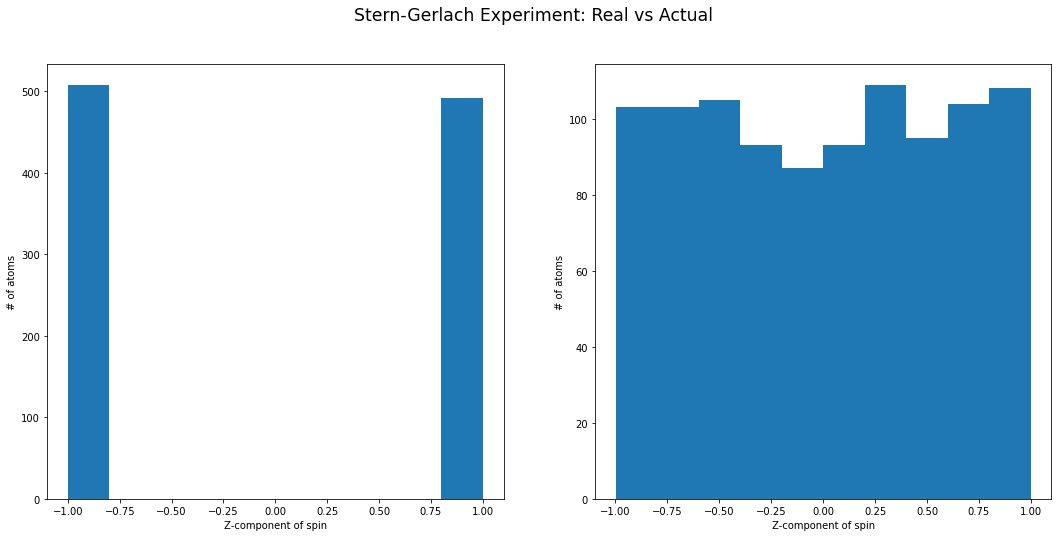

In [42]:
plot_real_vs_actual(spins)